In [2]:
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()


In [4]:
# Display the keys
print(iris.keys())

# Display feature names
print("Feature names:", iris.feature_names)

# Display target names (species)
print("Target names:", iris.target_names)

# Display the first 5 rows of data
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
print(iris_df.head())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


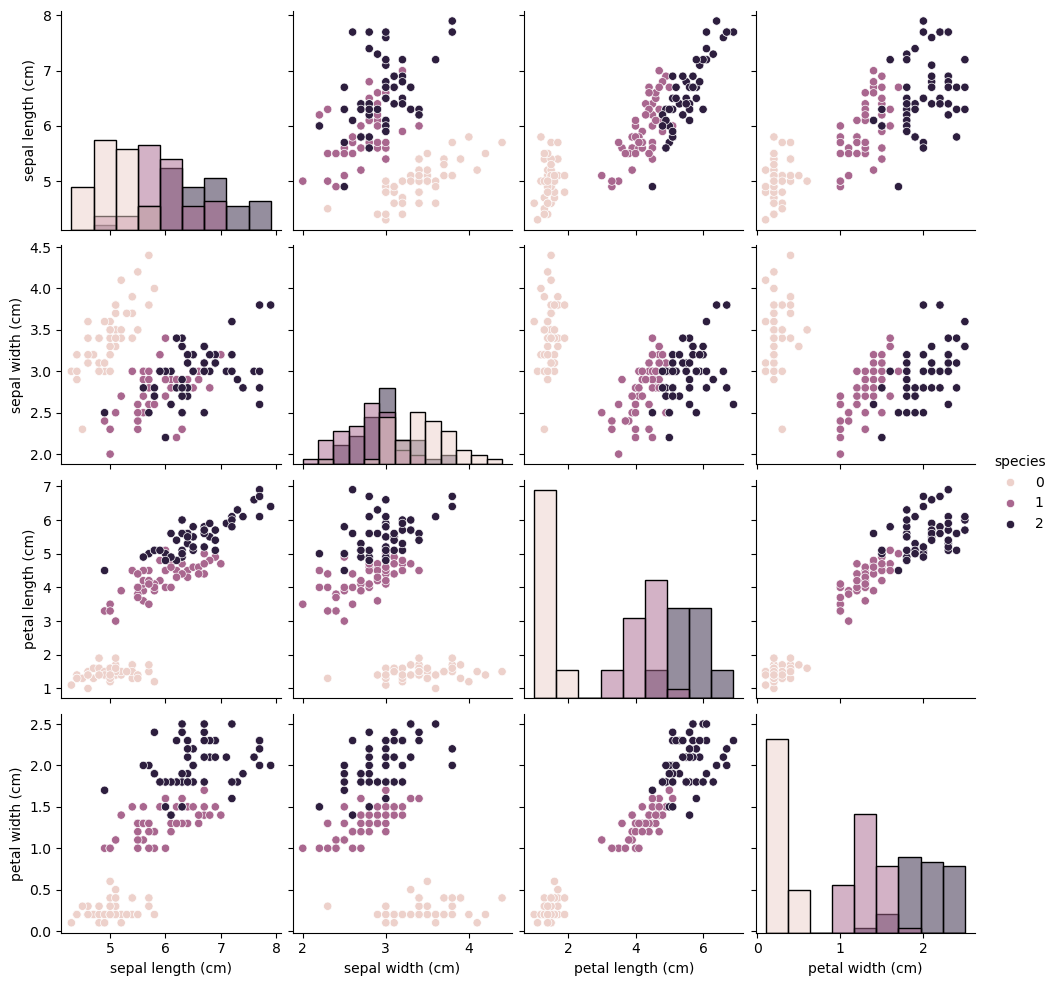

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot of the dataset
sns.pairplot(iris_df, hue="species", diag_kind="hist")
plt.show()


In [8]:
iris_df.to_csv("iris_dataset.csv", index=False)
print("Iris dataset exported to iris_dataset.csv")

Iris dataset exported to iris_dataset.csv


In [10]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [12]:
import yfinance as yf


In [14]:
# Retrieve NVIDIA stock data (last 1 year)
nvidia = yf.download("NVDA", period="1y")
print(nvidia.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open      Volume
Ticker           NVDA       NVDA       NVDA       NVDA        NVDA
Date                                                              
2024-03-04  85.212837  87.670141  83.695270  84.106149   615616000
2024-03-05  85.943665  86.076636  83.397270  85.249828   520639000
2024-03-06  88.679016  89.702776  87.009413  88.001183   582520000
2024-03-07  92.647072  92.745048  89.580796  90.136664   608119000
2024-03-08  87.507301  97.376968  86.485540  95.115502  1142269000


In [16]:
print(nvidia.info())
print(nvidia.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-03-04 to 2025-03-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   250 non-null    float64
 1   (High, NVDA)    250 non-null    float64
 2   (Low, NVDA)     250 non-null    float64
 3   (Open, NVDA)    250 non-null    float64
 4   (Volume, NVDA)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB
None
Price        Close        High         Low        Open        Volume
Ticker        NVDA        NVDA        NVDA        NVDA          NVDA
count   250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean    119.037129  121.457222  116.568290  119.279643  3.397786e+08
std      19.665430   19.850912   19.508816   19.828564  1.528470e+08
min      76.181976   80.054060   75.588123   78.085524  1.051570e+08
25%     104.358877  106.860994  101.389753  104.534172  2.264166e+08
50%     123.610458  125

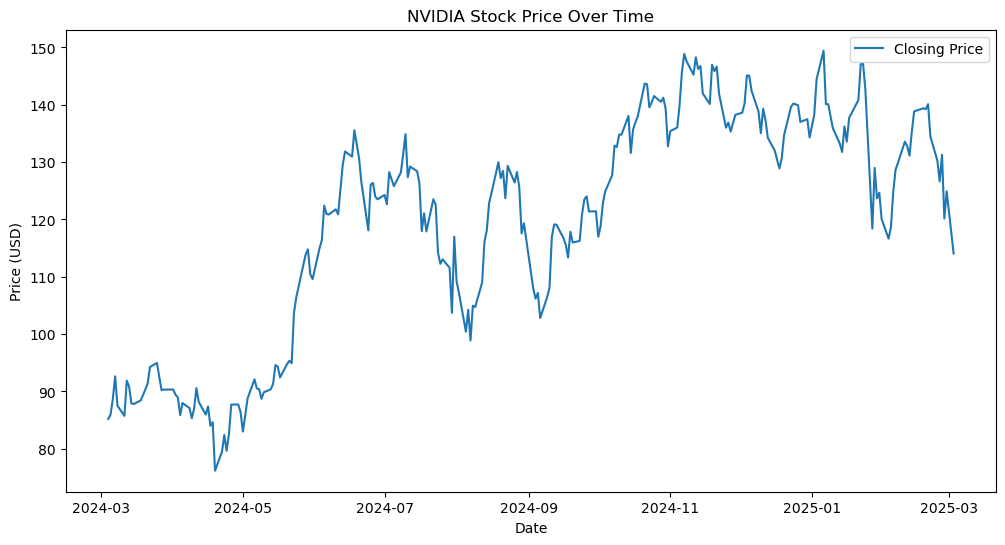

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(nvidia.index, nvidia['Close'], label="Closing Price")
plt.title("NVIDIA Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [20]:
nvidia.to_csv("nvidia_stock.csv")
print("NVIDIA stock data exported to nvidia_stock.csv")


NVIDIA stock data exported to nvidia_stock.csv


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


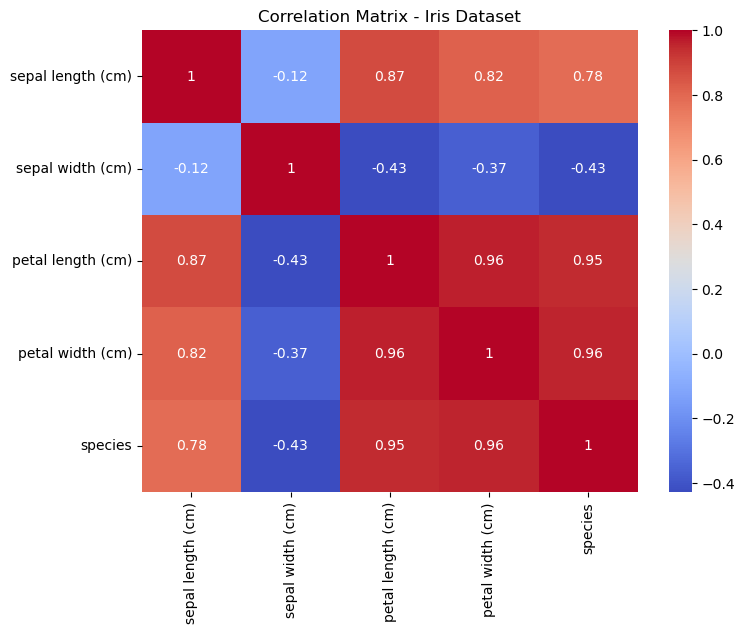

In [22]:
# Summary statistics
print(iris_df.describe())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Iris Dataset")
plt.show()


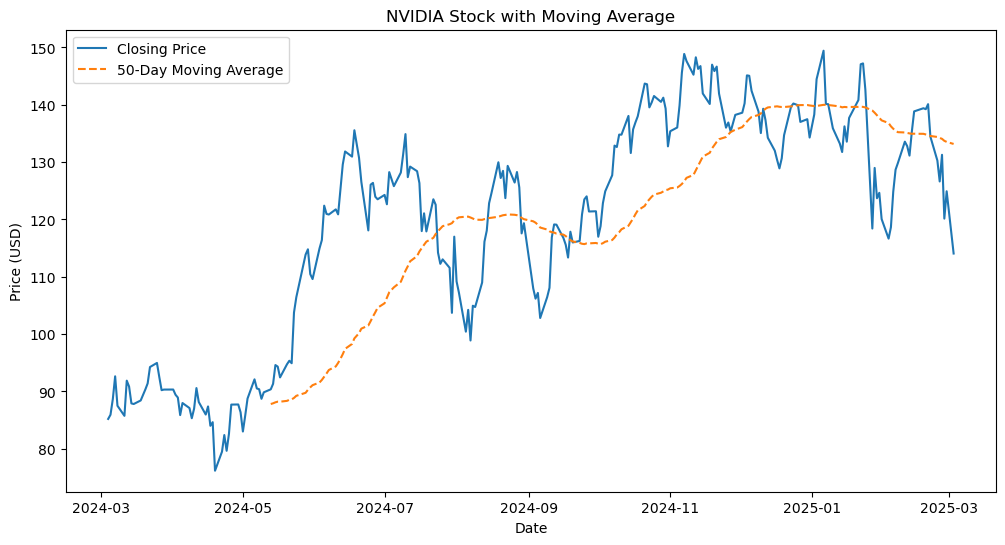

In [24]:
# Moving Average (50-day)
nvidia["50_MA"] = nvidia["Close"].rolling(window=50).mean()

# Plot stock price with moving average
plt.figure(figsize=(12, 6))
plt.plot(nvidia.index, nvidia["Close"], label="Closing Price")
plt.plot(nvidia.index, nvidia["50_MA"], label="50-Day Moving Average", linestyle="dashed")
plt.title("NVIDIA Stock with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
